## Numpy

In [11]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [12]:
%%timeit
import random
t1 = []
for i in range(10000):
    x = random.random()
    t1.append(x)
#print(t1)

1.21 ms ± 46.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [13]:
%%timeit
import numpy as np
t2 = np.random.randn(10000)

226 µs ± 4.19 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [14]:
%%timeit
from math import sin, cos
res1 = []
for r in t1:
    res1.append(sin(r) + cos(r))

626 ns ± 5.73 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [16]:
t2 = np.random.randn(10000)

In [17]:
%%timeit
import numpy as np
res2 = np.sin(t2) + np.cos(t2)

177 µs ± 5.53 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [29]:
import numpy as np
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def _cube_sum(x):
    return np.sum(x**3)

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

def _almost_variance(x):
    m = np.mean(x)
    return np.mean((x-m)**4)
t = np.random.randn(100000)

In [30]:
%%timeit
cube_sum(t)
almost_variance(t)

95.2 ms ± 7.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
%%timeit
_cube_sum(t)
_almost_variance(t)

7.31 ms ± 64.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [34]:
import numpy as np

def mult_table(n):
    rng = np.arange(1, n+1)
    return rng * rng[:, None]

mult_table(10)

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [57]:
t_5 = np.random.randn(10,5)
def d_e(x,y):
    return np.linalg.norm(x-y,axis=1)**2
np.sum((np.expand_dims(t_5,1) - t_5)**2,axis=2)

array([[ 0.        ,  6.53691265,  4.52964467,  5.09837636,  3.40114703,
         2.70076767, 10.46081605,  7.36137845,  8.14577961,  8.93360175],
       [ 6.53691265,  0.        , 15.16800468,  0.83638601,  9.26905511,
        10.2499659 ,  7.29716843,  5.26623769, 21.14162099,  4.29658185],
       [ 4.52964467, 15.16800468,  0.        , 12.00988829,  9.65910817,
         3.05761816, 15.91727176,  9.24272898,  9.84940395, 11.30940288],
       [ 5.09837636,  0.83638601, 12.00988829,  0.        ,  8.00006782,
         7.68106903,  5.20225477,  7.08813579, 18.49623564,  5.87651356],
       [ 3.40114703,  9.26905511,  9.65910817,  8.00006782,  0.        ,
         8.39956027,  5.76741543, 11.05385404,  2.8719874 , 16.04526665],
       [ 2.70076767, 10.2499659 ,  3.05761816,  7.68106903,  8.39956027,
         0.        , 13.37881441,  8.89603582, 12.04766461,  9.76194154],
       [10.46081605,  7.29716843, 15.91727176,  5.20225477,  5.76741543,
        13.37881441,  0.        , 13.58562157

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [40]:
def whiten(X):
    m = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    return (X-m) / sigma
X = np.random.randn(10,5)
whiten(X)

array([[ 0.93666217, -2.00779688, -0.82710772, -0.64696119,  2.28925765],
       [-1.81857654, -0.75487438, -1.06254571, -1.84099548,  0.59181746],
       [-1.28780587, -0.04406184,  0.02044753,  1.18715995, -0.33887024],
       [ 0.30158047, -1.19986024,  1.27892737,  0.30745143, -1.2273936 ],
       [-0.5879503 ,  1.14232188, -1.19132085,  0.50492718, -0.81979037],
       [ 0.60022945,  0.64391932, -0.34797991,  1.232689  , -0.14638873],
       [ 0.89842666,  0.13429066, -0.07896975,  0.95777922,  1.13047634],
       [ 0.19209302,  0.58542327,  0.04745478, -1.25923387, -0.30247247],
       [-0.6716407 ,  1.36312701,  2.23528268,  0.17404985, -0.46077393],
       [ 1.43698165,  0.13751119, -0.07418842, -0.6168661 , -0.7158621 ]])

### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [43]:
X = np.random.randn(10000)
def closest(x,A):
    return np.argmin(np.abs(x-A))
closest(1.5,np.array([1,-4,3])) + 1

1

### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [45]:
def poly(x,A):
    k = len(A)
    return np.sum(np.dot(A,np.power(x,np.arange(0,k,1))))
poly(1,np.array([1,2,3]))

6

## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

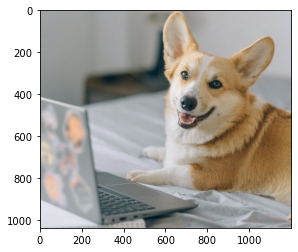

In [50]:
img = mpimg.imread('images/doggo.jpeg')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

(1038, 1200, 3) (1038, 1200)


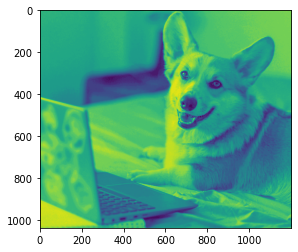

In [62]:
# img.shape
def skala_szarosci(img):
    img[:,:,0] = 0.2126 * img[:,:,0]
    img[:,:,1] = 0.7152 * img[:,:,1]
    img[:,:,2] = 0.0722 * img[:,:,2]
    return np.sum(img,axis=2)
print(img.shape,(skala_szarosci(img)).shape)
plt.imshow(skala_szarosci(img));

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [59]:
lambda_values = np.arange(0,1,0.1)
X = np.array([1,2])
def interpolate(x,lambda_values):
    return x[0] * lambda_values + (1-lambda_values)*x[1]

interpolate(X,lambda_values)

array([2. , 1.9, 1.8, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2, 1.1])